In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from allison.linear_models.logistic_regression import LogisticRegression
from allison.utils.functions.loss import binary_cross_entropy
from allison.utils.functions.activation import sigmoid
from allison.utils.metrics import accuracy,predict_labels
from allison.utils.functions.data import train_test_split

In [3]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['labels']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data=data[data['labels']<2]
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


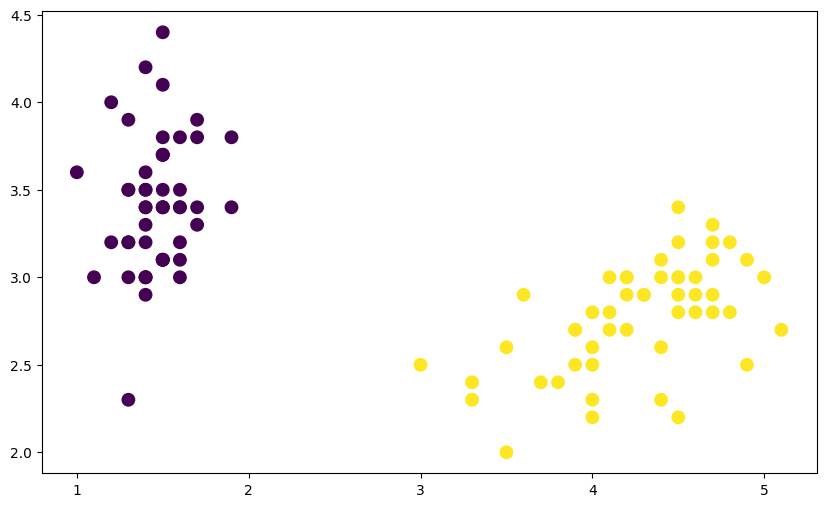

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(data['PetalLengthCm'],data['SepalWidthCm'],s=80,c=data['labels'] )

In [6]:
X=data[['PetalLengthCm','SepalWidthCm']]
y=data['labels']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
model=LogisticRegression()

model.optimizers(loss_function=binary_cross_entropy,
                 metric=accuracy,
                 learning_rate=0.001)

model.train(X_train,y_train,n_iters=20,history_train=True)

Iter:	2	==================================================>	 binary_cross_entropy: 159.468	 accuracy: 47.50% 

Iter:	4	==================================================>	 binary_cross_entropy: 126.752	 accuracy: 47.50% 

Iter:	6	==================================================>	 binary_cross_entropy: 97.386	 accuracy: 47.50% 

Iter:	8	==================================================>	 binary_cross_entropy: 73.375	 accuracy: 47.50% 

Iter:	10	==================================================>	 binary_cross_entropy: 56.941	 accuracy: 47.50% 

Iter:	12	==================================================>	 binary_cross_entropy: 48.473	 accuracy: 47.50% 

Iter:	14	==================================================>	 binary_cross_entropy: 45.578	 accuracy: 53.75% 

Iter:	16	==================================================>	 binary_cross_entropy: 45.148	 accuracy: 98.75% 

Iter:	18	==================================================>	 binary_cross_entropy: 45.370	 accuracy: 100.00% 

It

In [13]:
history=model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [159.46839837527344,
  126.7519138262798,
  97.38610769910427,
  73.37518788140514,
  56.9408635383393,
  48.47340510140679,
  45.578404297212614,
  45.147547992698584,
  45.369676108662794,
  45.627312209235185],
 'precision': [47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 53.75, 98.75, 100.0, 100.0],
 'params': [{'bias': array([0.60595997]),
   'weights': array([0.92630088, 0.65107703])},
  {'bias': array([0.55306759]), 'weights': array([0.77932617, 0.4865156 ])},
  {'bias': array([0.50259031]), 'weights': array([0.63906242, 0.32946815])},
  {'bias': array([0.45529644]), 'weights': array([0.50764459, 0.18232512])},
  {'bias': array([0.41300558]), 'weights': array([0.39012884, 0.05074765])},
  {'bias': array([0.3782092]), 'weights': array([ 0.29343841, -0.05751258])},
  {'bias': array([0.35276707]), 'weights': array([ 0.2227411, -0.1366694])},
  {'bias': array([0.33641361]), 'weights': array([ 0.17729892, -0.1875491 ])},
  {'bias': array([

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']


    ax.scatter(X_train['PetalLengthCm'], 
               X_train['SepalWidthCm'], s=80, 
               c=model.predict(X_train))
    
    if i > 0:
    
        ax.title.set_text(f"Iteration: {history['iter'][i-1]}, Loss: {history['loss'][i-1]:.2f}, Accuracy: {history['precision'][i-1]:.2f}%")


plt.close()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)
# Display the animation
HTML(ani.to_jshtml())

In [26]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [27]:
model.evaluate(X_test,y_test)

100.0

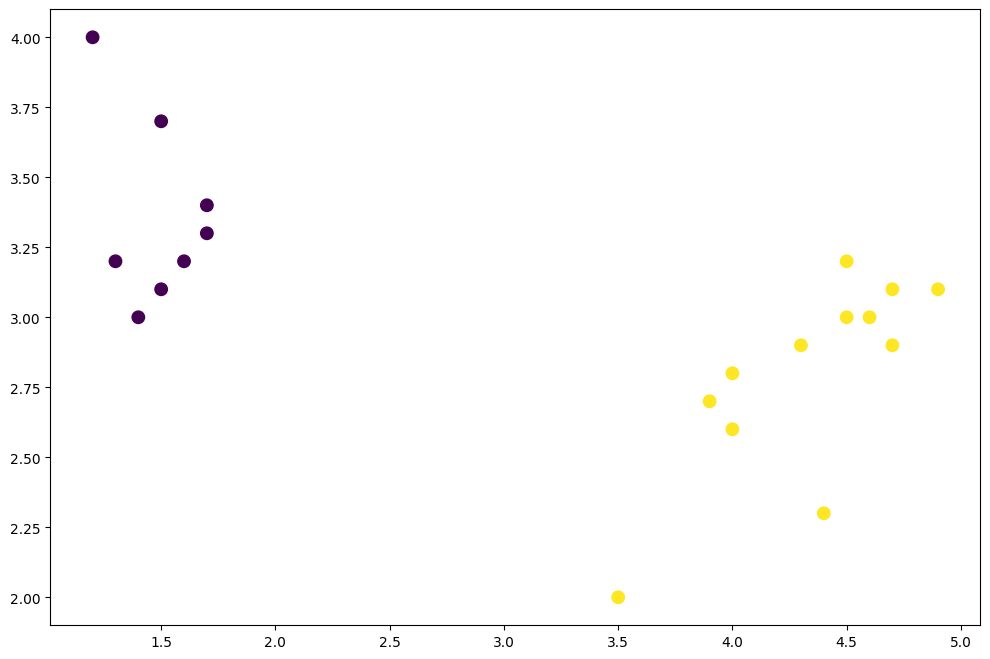

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(X_test['PetalLengthCm'],X_test['SepalWidthCm'],s=80,c=model.predict(X_test))